In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\python\Dta science\iris\archive (6)\IRIS.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146      

In [4]:
model = LogisticRegression()

x=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['species']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=20)

model.fit(x,y)

y_pred=model.predict(x_test)

print("Accuracy : ",accuracy_score(y_pred,y_test))


Accuracy :  1.0


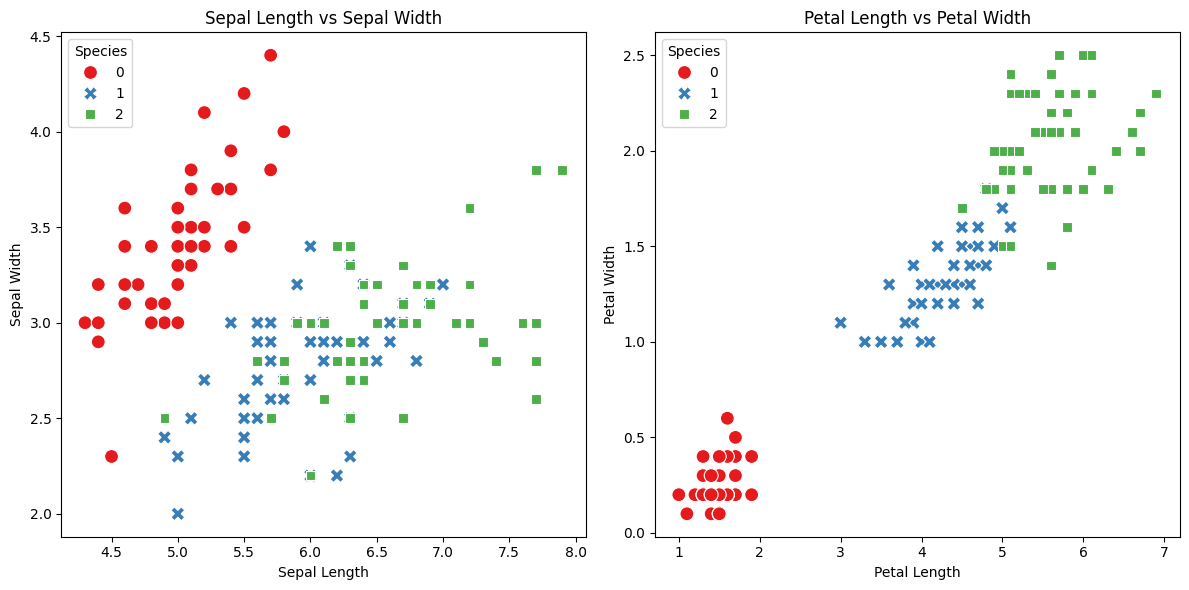

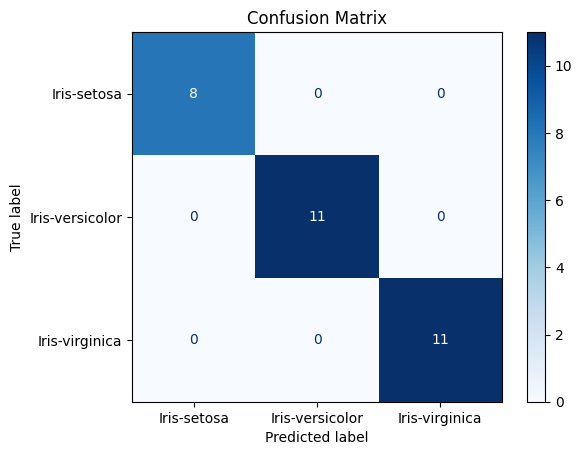

In [5]:

# Visualize the data
plt.figure(figsize=(12, 6))

# Scatter plot of Sepal Length vs Sepal Width colored by species
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', palette='Set1', style='species', s=100)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Species', loc='upper left')

# Scatter plot of Petal Length vs Petal Width colored by species
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', palette='Set1', style='species', s=100)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(title='Species', loc='upper left')

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()